# training data
Masking by training data shapefile example.

### create mask from shapefile
the general approach is reading and rasterizing shapefiles using rasterio (need to reproject to eo images crs). The resulting object can the be read using xarray rasterio method, which can be used to mask xarray objects.

In [4]:
import rasterio
import xarray as xr
import numpy as np
import geopandas as gpd
from affine import Affine

In [5]:
reference_file = "/home/azalazar/data/training_data/Sentinel_2_L2A/Subset_20160110_L2A_Sald.data/B2.img"
rasterized_file = '/home/azalazar/data/training_data/test_raster.tif'

In [6]:
# Get reference file meta
rst = rasterio.open(reference_file)
meta = rst.meta.copy()
meta.update(compress='lzw', dtype=rasterio.float64)

lotes = gpd.read_file('/home/azalazar/data/training_data/saldana.shp')
lotes_rep = lotes.to_crs({'init': 'epsg:32618'})

for date in 

with rasterio.open(rasterized_file, 'w', **meta) as out:
    out_arr = out.read(1)
    
    # geom, value pairs to use in rasterizing
    )
    
    burned = rasterio.features.rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform)
    
    out.write_band(1, burned)


/home/azalazar/anaconda2/envs/read-explore/lib/python2.7/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


In [17]:
out_dir = '/home/azalazar/data/training_data/'

rst = rasterio.open(reference_file)
meta = rst.meta.copy()
meta.update(compress='lzw', dtype=rasterio.float64)

for column in lotes_rep:
    
    if lotes_rep[column].name[0] == 'X':
        
        date = lotes_rep[column].name[1:]
        out_file = out_dir+date+'.tif'
        
        print(date)
        
        with rasterio.open(out_file, 'w', **meta) as out:
            out_arr = out.read(1)
            shapes = ((geom,value) for geom, value in zip(lotes_rep.geometry, lotes_rep[column].astype('float64')))
            burned = rasterio.features.rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform)
            out.write_band(1, burned.astype(rasterio.float64))
        

20151120
20151127
20151204
20151206
20151211
20151221
20151222
20151228
20151231
20160107
20160110
20160114
20160120
20160121
20160123


In [19]:
da = xr.open_rasterio(out_dir+'20151120.tif')
da#.plot()

<xarray.DataArray (band: 1, y: 3025, x: 2704)>
[8179600 values with dtype=float64]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 4.454e+05 4.454e+05 4.454e+05 4.454e+05 4.454e+05 ...
  * x        (x) float64 4.914e+05 4.914e+05 4.914e+05 4.914e+05 4.914e+05 ...
Attributes:
    crs:                       +init=epsg:32618
    header_offset:             0
    description:               /home/azalazar/data/training_data/20151120.tif
    data_type:                 5
    nodatavals:                (nan,)
    file_type:                 ENVI Standard
    res:                       (10.0, 10.0)
    lines:                     3025
    transform:                 (491390.0, 10.0, -0.0, 445430.0, -0.0, -10.0)
    byte_order:                0
    coordinate_system_string:  PROJCS["WGS_1984_UTM_Zone_18N",GEOGCS["GCS_WGS...
    interleave:                bsq
    is_tiled:                  0
    samples:                   2704
    bands:                     1
    band_names:        

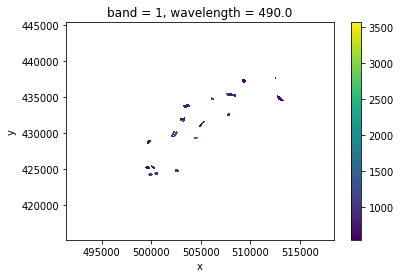

In [22]:
b2 = xr.open_rasterio(reference_file)
b2.where(da != 0).plot()

In [111]:
mask = da == 1
b2.where(mask)

<xarray.DataArray (band: 1, y: 3025, x: 2704)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * band        (band) int64 1
  * y           (y) float64 4.454e+05 4.454e+05 4.454e+05 4.454e+05 ...
  * x           (x) float64 4.914e+05 4.914e+05 4.914e+05 4.914e+05 ...
    wavelength  (band) float64 490.0
Attributes:
    crs:                       +init=epsg:32618
    header_offset:             0
    data_offset_values:        0.0
    data_type:                 12
    nodatavals:                (nan,)
    file_type:                 ENVI Standard
    res:                       (10.0, 10.0)
    lines:                     3025
    transform:                 (491390.0, 10.0, -0.0, 445430.0, -0.0, -10.0)
    byte_order:                1
    coordinate_system_string:  PROJCS["WGS 84 / UTM zone 18N", GEOGCS["WGS 84...
    interleave:                bsq
    data_gain_values: 

In [2]:
radar = S1TempStack('/home/azalazar/data/Ibague/pre/', '/home/azalazar/data/Ibague/pre/stack/')
optical = S2TempStack('/home/azalazar/data/Ibague/pre/', '/home/azalazar/data/Ibague/pre/stack/')

S1 object initialized from /home/azalazar/data/Ibague/pre/
S2 object initialized from /home/azalazar/data/Ibague/pre/


/home/azalazar/anaconda2/envs/read-explore/lib/python2.7/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


Dos opciones, la creación de un Dataset o Array.

In [3]:
optical_array = optical.getXarray()
optical_dtset = optical.getXDataset()

In [4]:
radar_array = radar.getXarray()

In [5]:
optical_dtset

<xarray.Dataset>
Dimensions:                       (time: 18, x: 1638, y: 1418)
Coordinates:
    band                          int64 1
  * y                             (y) float64 4.939e+05 4.939e+05 4.939e+05 ...
  * x                             (x) float64 4.793e+05 4.793e+05 4.793e+05 ...
  * time                          (time) datetime64[ns] 2018-02-03 ...
    mask                          (time, y, x) bool False False False False ...
Data variables:
    quality_cloud_confidence      (time, y, x) uint16 39 39 38 38 35 35 31 ...
    quality_scene_classification  (time, y, x) uint16 8 8 8 8 8 8 8 8 8 8 8 ...
    green                         (time, y, x) uint16 12332 12331 12289 ...
    red                           (time, y, x) uint16 11982 12016 12037 ...
    swir2                         (time, y, x) uint16 2548 2548 2500 2500 ...
    blue                          (time, y, x) uint16 12415 12417 12337 ...
    swir1                         (time, y, x) uint16 2243 2243 2228 2228

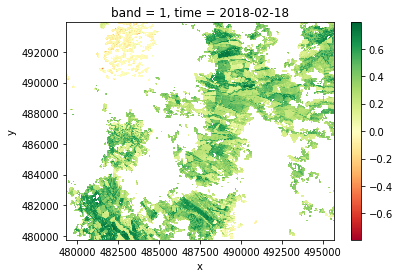

In [26]:
av_dates = optical_dtset.coords['time'].data.tolist()
date = av_dates[5]

optical_dtset['NDVI'].sel(time=date).where(optical_dtset.mask.sel(time=date)).plot(cmap='RdYlGn')

In [5]:
time_series = optical_dtset['NDVI'].where(optical_dtset.mask).isel(y=100, x=100)
time_series

<xarray.DataArray (time: 18)>
array([0.027758,      nan,      nan,      nan,      nan,      nan, 0.827557,
            nan,      nan,      nan, 0.817415,      nan,      nan, 0.763187,
            nan, 0.602279,      nan,      nan], dtype=float32)
Coordinates:
    band     int64 1
    y        float64 4.929e+05
    x        float64 4.803e+05
  * time     (time) datetime64[ns] 2018-02-03 2018-01-04 2018-02-08 ...
    mask     (time) bool True False False False False False True False False ...
Attributes:
    crs:                       +init=epsg:32618
    header_offset:             0
    data_type:                 4
    nodatavals:                (nan,)
    file_type:                 ENVI Standard
    res:                       (10.0, 10.0)
    lines:                     1418
    transform:                 (479300.0, 10.0, -0.0, 493930.0, -0.0, -10.0)
    byte_order:                0
    coordinate_system_string:  PROJCS["WGS_1984_UTM_Zone_18N",GEOGCS["GCS_WGS...
    interleave:         

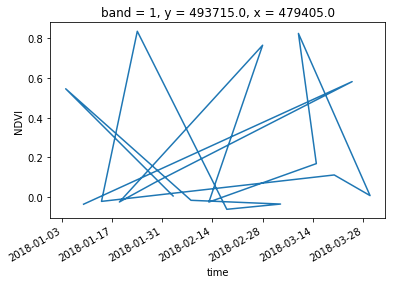

In [9]:
%matplotlib inline
optical_dtset['NDVI'].sel(x=479405, y=493715).plot(x='time')
#time_series.plot()

In [13]:
date = optical.getTempData('NDVI')
cloud = list(map(lambda x: x*100, optical.calcQualityPixels()))
print('Date: Quality pixels (%)')
for idx, val in enumerate(date):
        print('{}: {}'.format(val, cloud[idx]))

Date: Quality pixels (%)
2018-02-03: 7.51802655893
2018-01-04: 66.0291283705
2018-02-08: 3.69029967055
2018-02-23: 20.2502794181
2018-03-05: 0.00413314940818
2018-02-18: 30.6056269385
2018-01-24: 99.355745336
2018-01-14: 32.000650971
2018-03-20: 15.0697210641
2018-03-30: 4.82769072332
2018-03-10: 99.5837574117
2018-03-15: 28.6427253987
2018-02-13: 0.0499422220156
2018-02-28: 76.6849041884
2018-01-19: 41.8479655433
2018-01-29: 68.4575258623
2018-03-25: 90.0032031908
2018-01-09: 0.0618250265641


In [326]:
imindex = 0

In [9]:
## for mosaicing, a possible approach is gdalbuildvrt

# xarray

In [ ]:
## Check chunks meaning
#chunks = {'x': 5490, 'y': 5490, 'band': 1}
#da = xr.concat([xr.open_rasterio(f, chunks=chunks) for f in filenames], dim=time)
## To-do define type of dtype needed. Currently as dtype object
#da.to_netcdf('/home/azalazar/data/pre/stacks/Ibague.nc')
# Four axes, returned as a 2-d array

In [4]:
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import datetime as dt

@xr.register_dataarray_accessor('eotemp')
class EOTempArray(object):
    
    def __init__(self, xarray_obj):
        self._obj = xarray_obj
        
    def plot_RGB(self):
        
        crs = ccrs.UTM('18N')
        av_dates = self._obj.coords['time'].data.tolist()
        
        plt.figure(figsize=(15,3*math.ceil(len(av_dates)/5.0)))
        try:
            rgb = self._obj.sel(band=['red', 'green', 'blue']).sortby('time')
        except:
            print('The EOTempArray does not contain rgb bands')
            return None
        for ix, date in enumerate(av_dates):
            ap = rgb.isel(time=ix)/10000
            ax = plt.subplot(math.ceil(len(av_dates)/5.0),5,1+ix, projection=crs)
            ap.plot.imshow(rgb='band', transform=crs)
        
        #plt.savefig("/home/azalazar/data/pre/stacks/rgb.pdf", dpi=300)
        plt.show()
        
#xr.register_accessor('spec', EOTempArray)

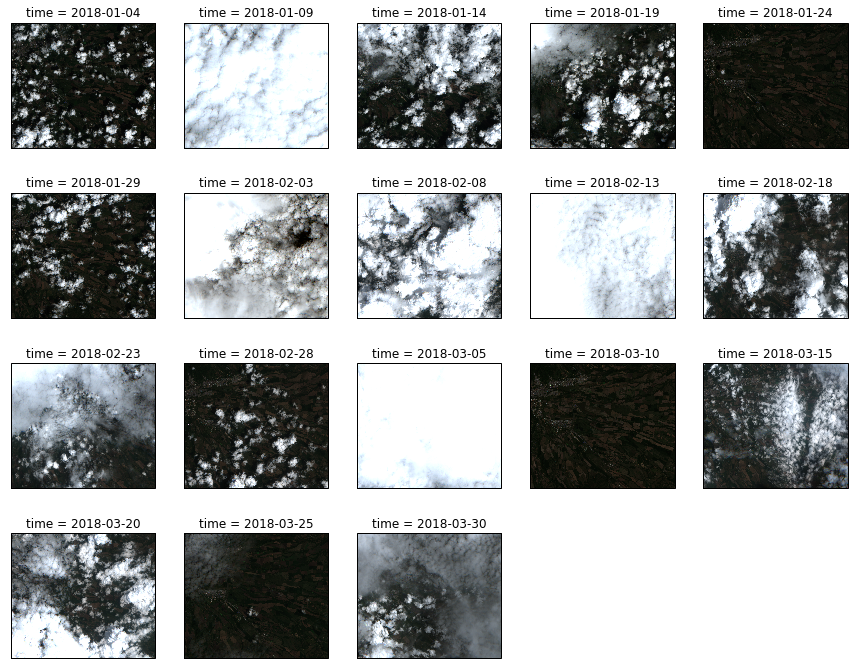

In [5]:
#import eotemparray
import xarray as xr

ds = optical_array

ds.eotemp.plot_RGB()  # calls the EOTempArray.plot_RGB method

In [6]:
radar_array.eotemp.plot_RGB()

The EOTempArray does not contain rgb bands


<Figure size 1080x432 with 0 Axes>

Use xarray object to report rgb images of eo_stack

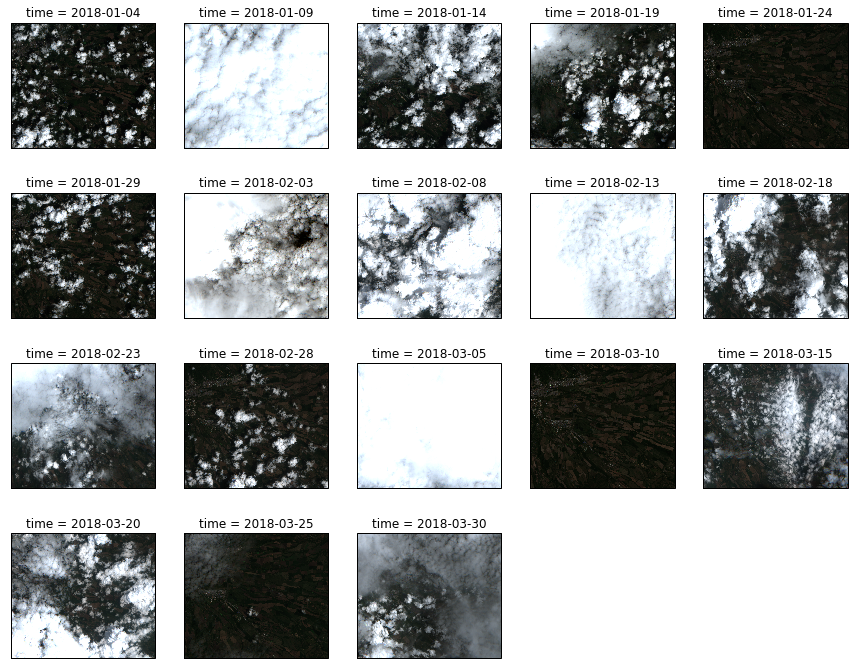

In [250]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import datetime as dt
import math

crs = ccrs.UTM('18N')

av_dates = optical_array.coords['time'].data.tolist()

plt.figure(figsize=(15,3*math.ceil(len(av_dates)/5.0)))

rgb = optical_array.sel(band=['red', 'green', 'blue']).sortby('time')

for ix, date in enumerate(av_dates):
    ap = rgb.isel(time=ix)/10000
    ax = plt.subplot(math.ceil(len(av_dates)/5.0),5,1+ix, projection=crs)
    ap.plot.imshow(rgb='band', transform=crs)

plt.savefig("/home/azalazar/data/pre/stacks/rgb.pdf", dpi=300)
plt.show()

In [264]:
optical_array.get_index('band').tolist()#strftime('%Y%m%d')#.argmin()

['CloudQA1',
 'CloudQA2',
 'green',
 'red',
 'swir2',
 'blue',
 'swir1',
 'NDVI',
 'LSWI',
 'nir']

In [16]:
radar_array

<xarray.DataArray (band: 2, time: 8, y: 1418, x: 1638)>
array([[[[  0.      , ..., -11.496504],
         ...,
         [-10.082618, ..., -12.338342]],

        ...,

        [[  0.      , ..., -11.756023],
         ...,
         [-10.27107 , ..., -13.744316]]],


       [[[  0.      , ..., -14.712528],
         ...,
         [-14.555594, ..., -17.11843 ]],

        ...,

        [[  0.      , ..., -17.88677 ],
         ...,
         [-14.638231, ..., -18.929918]]]], dtype=float32)
Coordinates:
  * y        (y) float64 4.939e+05 4.939e+05 4.939e+05 4.939e+05 4.939e+05 ...
  * x        (x) float64 4.793e+05 4.793e+05 4.793e+05 4.793e+05 4.793e+05 ...
  * time     (time) datetime64[ns] 2018-01-16 2018-03-17 2018-03-29 ...
  * band     (band) object 'VV' 'VH'
Attributes:
    crs:                       +init=epsg:32618
    header_offset:             0
    data_offset_values:        0.0
    data_type:                 4
    nodatavals:                (nan,)
    file_type:                 ENVI

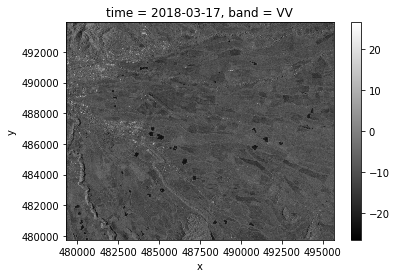

In [18]:
av_dates = radar_array.coords['time'].data.tolist()
date = av_dates[1]

radar_array.sel(band='VV',time=date).plot(cmap='gist_gray')

In [29]:
import rasterio

band_1 = '/home/azalazar/data/Ibague/Landsat/LC080080572018011201T2-SC20180419150443/LC08_L1TP_008057_20180112_20180119_01_T2_sr_band1.tif'

with rasterio.open(band_1) as src:
                readband = src.read(1)
        
readband

array([[-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       ...,
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999]], dtype=int16)

In [30]:
testxr = xr.open_rasterio(band_1)
testxr

<xarray.DataArray (band: 1, y: 7731, x: 7581)>
[58608711 values with dtype=int16]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 5.952e+05 5.952e+05 5.951e+05 5.951e+05 5.951e+05 ...
  * x        (x) float64 4.449e+05 4.449e+05 4.45e+05 4.45e+05 4.45e+05 ...
Attributes:
    crs:         +init=epsg:32618
    is_tiled:    0
    nodatavals:  (-9999.0,)
    transform:   (444885.0, 30.0, 0.0, 595215.0, 0.0, -30.0)
    res:         (30.0, 30.0)